KeyError: 1000

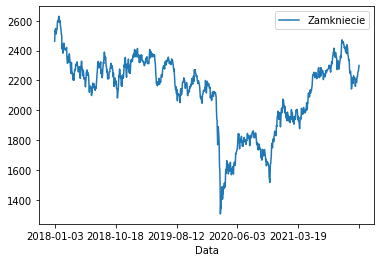

In [32]:
import jupyterlab
import matplotlib.pyplot as plt
import matplotlib_inline
import pandas as pd
import jupyter

data = pd.read_csv('data.csv')
data.plot(x="Data", y="Zamkniecie")
macd = []
signal = []


def ema(data, n, i):
    alfa = 2 / (n + 1)
    up = data[i]
    down = 1.0
    for k in range(n):
        up += data[i-n+k] * pow(1 - alfa, n-k)
        down += pow(1 - alfa, n-k)
    return up / down


def macd(data):
    macd = []
    for i in range(1, 1001):
        if i>=26:
            EMA12 = ema(data.Zamkniecie, 12, i)
            EMA26 = ema(data.Zamkniecie, 26, i)
            macd.append(EMA12 - EMA26)
        else:
            macd.append(ema(data.Zamkniecie, i, i))
    return macd


def signal(macd):
    signal = []
    for i in range(1, 1001):
        if i>=9:
            signal.append(ema(macd[i], 9, i))
        else:
            signal.append(ema(macd[i], i, i))
    return signal


macd = macd(data)
signal = signal(macd)
plt.plot(macd, label='MACD', color='red')
plt.plot(signal, label='SIGNAL', color='blue')
plt.grid(True)
plt.legend()
plt.show()

